# Artificial Neural Network

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### DATASET

In [3]:
df = pd.read_csv("C://Users//ertug//Desktop//Machine_Learning_Courses//_3_Classification//diabetes.csv//diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
y = df["Outcome"]

In [6]:
X = df.drop(["Outcome"], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=.3,
                                                    random_state=42)

In [8]:
X_Scaled_Train = StandardScaler().fit(X_train).transform(X_train)

In [9]:
X_Scaled_Test = StandardScaler().fit(X_test).transform(X_test)

### Model & Training

In [10]:
mlpc_model = MLPClassifier(max_iter=10000).fit(X_Scaled_Train, y_train)

In [11]:
?mlpc_model

Type:        MLPClassifier
String form: MLPClassifier(max_iter=10000)
File:        c:\users\ertug\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam

In [12]:
mlpc_model.coefs_

[array([[-8.35145403e-01, -5.08236903e-02, -4.42733294e-01,
         -4.27809831e-01, -9.79657224e-01, -7.80013640e-01,
         -2.73176113e-01,  4.94600321e-01, -4.70442542e-01,
          1.07288242e-02,  3.26727257e-02, -3.70080310e-01,
          2.15321383e-01,  9.61918921e-01,  1.09837216e-01,
          1.73926483e-01, -5.83829781e-01, -3.18524510e-01,
         -4.81432511e-01, -3.04089276e-01,  6.73724774e-02,
          4.95420173e-02, -1.25692177e-01,  6.69832903e-03,
         -3.74356743e-01, -7.85686141e-01, -9.40626887e-01,
          2.76890844e-01,  8.28031893e-01,  1.65963506e-01,
          1.61733755e-02, -8.98964456e-01,  2.24391352e-03,
          9.45006682e-02,  4.67272036e-01, -9.90471784e-01,
          4.56243396e-01, -2.61618384e-01, -2.49376331e-01,
         -2.60904781e-01,  2.81496726e-01,  2.00169888e-01,
          1.12705209e-01, -3.09833030e-01,  5.62472488e-01,
          1.58897339e-01,  5.32514094e-01,  4.11250569e-01,
          5.17094087e-01, -4.79826252e-0

In [13]:
mlpc_model.intercepts_

[array([ 0.07955813,  0.67760231,  0.42516583, -0.02075285, -0.25873616,
         0.00500037,  0.66821268, -0.21784373, -0.22557911,  0.36059068,
         0.31227557,  0.68953213,  0.54507119,  0.35370843, -0.75728656,
         0.61235323, -0.92067746,  0.07523327, -0.47273899,  0.17220758,
        -0.0038009 ,  0.92723642, -0.96135847,  0.01943321,  0.7863939 ,
        -0.13976583, -0.04583457,  0.55006885,  0.6747132 ,  0.62127964,
         0.67969483,  0.37606851,  0.62511297, -1.18602113, -0.52849155,
         0.79013323,  0.3636012 , -0.11555916, -1.29180386, -0.55191318,
         0.01236513, -0.25116335,  0.61833643, -0.42411454,  0.1900151 ,
        -0.11683286, -0.50879316,  0.08371912, -0.1293098 , -0.66576158,
         0.4591849 ,  0.40481849,  0.93083105,  0.23403483,  0.86470039,
         0.26413748, -0.50773589,  0.33512746,  0.89401096, -0.2881156 ,
         0.20696581, -0.59003026, -0.70425129,  0.7614739 ,  0.36796535,
         0.25456028, -1.61031591,  0.26506123, -0.5

In [14]:
y_pred = mlpc_model.predict(X_Scaled_Test)

In [15]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.5582905262390825

In [16]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [17]:
r2_score(y_test, y_pred)

-0.3768211920529805

In [18]:
confusion_matrix(y_test, y_pred)

array([[115,  36],
       [ 36,  44]], dtype=int64)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       151
           1       0.55      0.55      0.55        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



In [20]:
mlpc_model.predict_proba(X_Scaled_Test)[:10]

array([[9.99888072e-01, 1.11927978e-04],
       [9.97442488e-01, 2.55751214e-03],
       [9.16699799e-01, 8.33002005e-02],
       [4.22186163e-01, 5.77813837e-01],
       [8.04536742e-01, 1.95463258e-01],
       [7.96366282e-01, 2.03633718e-01],
       [1.00000000e+00, 1.89190910e-11],
       [8.47435021e-03, 9.91525650e-01],
       [1.81427869e-02, 9.81857213e-01],
       [3.64138313e-02, 9.63586169e-01]])

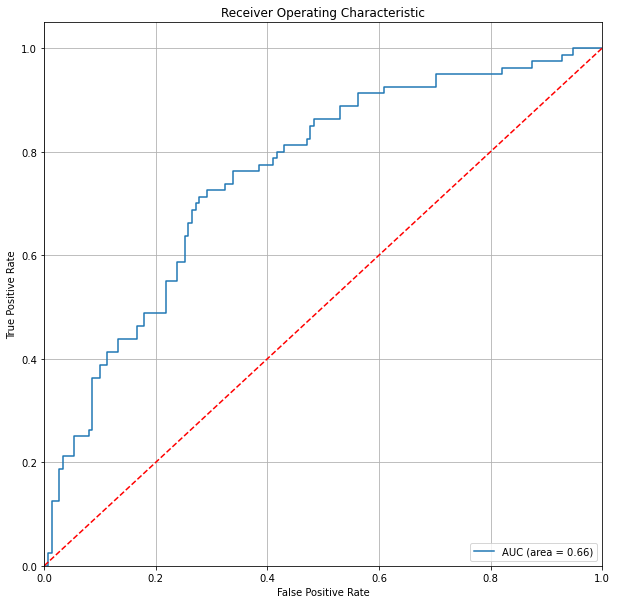

In [21]:
logit_roc_auc = roc_auc_score(y_test, mlpc_model.predict(X_Scaled_Test))
fpr, tpr, thresholds = roc_curve(y_test, mlpc_model.predict_proba(X_Scaled_Test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("LOG_ROC")
plt.grid(1)
plt.show()

### MODEL TUNING

In [22]:
mlcp_params = {"alpha": [.1, .001, .0001, .00005, .03],
               "hidden_layer_sizes": [(10, 10), (3, 5), (100, 100, 100)]}

In [23]:
mlpc_model = MLPClassifier(solver="lbfgs", max_iter=10000).fit(X_Scaled_Train, y_train)

In [24]:
mlpc_cv_model = GridSearchCV(mlpc_model, mlcp_params, cv=10, verbose=2, n_jobs=-1).fit(X_Scaled_Train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 12.6min finished


In [25]:
mlpc_cv_model.best_params_

{'alpha': 0.0001, 'hidden_layer_sizes': (3, 5)}

In [26]:
mlpc_cv_model.best_score_

0.746785464709993

In [27]:
mlpc_tuned = MLPClassifier(alpha=mlpc_cv_model.best_params_.get("alpha"),
                           hidden_layer_sizes=mlpc_cv_model.best_params_.get("hidden_layer_sizes"), 
                           max_iter=10000).fit(X_Scaled_Train, 
                                               y_train)

In [28]:
y_pred = mlpc_tuned.predict(X_Scaled_Test)

In [29]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.4879500364742666

In [30]:
accuracy_score(y_test, y_pred)

0.7619047619047619

In [31]:
r2_score(y_test, y_pred)

-0.051738410596026796

In [32]:
confusion_matrix(y_test, y_pred)

array([[125,  26],
       [ 29,  51]], dtype=int64)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       151
           1       0.66      0.64      0.65        80

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



In [34]:
mlpc_tuned.predict_proba(X_Scaled_Test)[:10]

array([[0.8151997 , 0.1848003 ],
       [0.86439223, 0.13560777],
       [0.91944101, 0.08055899],
       [0.77517097, 0.22482903],
       [0.52946177, 0.47053823],
       [0.75850133, 0.24149867],
       [0.99319054, 0.00680946],
       [0.29132104, 0.70867896],
       [0.33801298, 0.66198702],
       [0.2122732 , 0.7877268 ]])

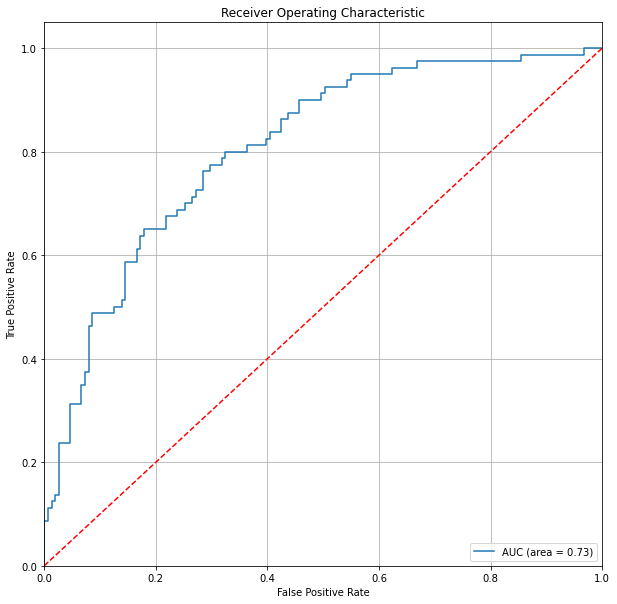

In [35]:
logit_roc_auc = roc_auc_score(y_test, mlpc_tuned.predict(X_Scaled_Test))
fpr, tpr, thresholds = roc_curve(y_test, mlpc_tuned.predict_proba(X_Scaled_Test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("LOG_ROC")
plt.grid(1)
plt.show()